In [1]:
import cv2 as cv
import glob
import os
import skimage
import pandas as pd
import numpy as np

## Augmentasi Citra

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Menentukan scalling dan perubahan setiap data train
datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=75,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap'
                )

dataImage = './Dataset/Augmented_Citra_PCD'
datagen.flow_from_directory(
        dataImage,  # Direktori data citra
        target_size=(150, 150),  # Mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        class_mode='categorical'
    )

Found 5080 images belonging to 3 classes.


## Membaca Citra Image & Lakukan GLCM Dengan 4 Derajat

In [3]:
images = []
labels = []

for directory_path in glob.glob("./Dataset/Augmented_Citra_PCD/*"):
    label = directory_path.split("\\")[-1]
    label = label.split('/')
    for img_path in glob.glob(os.path.join(directory_path,"*.png")):
        img = cv.imread(img_path)
        gray = skimage.color.rgb2gray(img)
        image = skimage.img_as_ubyte(gray)

        bins = np.array([0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 255])
        inds = np.digitize(image, bins)

        max_value = inds.max() + 1
        matrix_coocurrence = skimage.feature.greycomatrix(inds, [1], [0, 45, 90, 135], levels=max_value, normed=False, symmetric=False)

        images.append(matrix_coocurrence)
        labels.append(label[-1])

d:\Python\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
d:\Python\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
d:\Python\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
d:\Python\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
d:\Python\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Functio

## Membuat Fungsi Properti Untuk GLCM Fitur

In [4]:
def contrast_feature(matrix_coocurrence):
	contrast = skimage.feature.greycoprops(matrix_coocurrence, 'contrast')
	return contrast

def dissimilarity_feature(matrix_coocurrence):
	dissimilarity = skimage.feature.greycoprops(matrix_coocurrence, 'dissimilarity')	
	return dissimilarity

def homogeneity_feature(matrix_coocurrence):
	homogeneity = skimage.feature.greycoprops(matrix_coocurrence, 'homogeneity')
	return homogeneity

def energy_feature(matrix_coocurrence):
	energy = skimage.feature.greycoprops(matrix_coocurrence, 'energy')
	return energy

def correlation_feature(matrix_coocurrence):
	correlation = skimage.feature.greycoprops(matrix_coocurrence, 'correlation')
	return correlation

def asm_feature(matrix_coocurrence):
	asm = skimage.feature.greycoprops(matrix_coocurrence, 'ASM')
	return asm

## Jalankan Fungsi Diatas & Simpan ke Datafrme

In [5]:
data = pd.DataFrame(np.concatenate((
                    contrast_feature(images[0]), dissimilarity_feature(images[0]), homogeneity_feature(images[0]),
                    energy_feature(images[0]), correlation_feature(images[0]), asm_feature(images[0])
                ), axis=1))


for i in range(1, len(images)) :
    res = np.concatenate((
            contrast_feature(images[i]), dissimilarity_feature(images[i]), homogeneity_feature(images[i]),
            energy_feature(images[i]), correlation_feature(images[i]), asm_feature(images[i])
        ), axis=1)
    data_append = pd.DataFrame(res)
    data = data.append(data_append)

data

d:\Python\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
d:\Python\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
d:\Python\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
d:\Python\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
d:\Python\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``grey

0         1         2         3         4         5         6   \
0   0.162441  0.416648  0.344858  0.162441  0.155619  0.309659  0.268911   
0   0.161355  0.350297  0.301323  0.161355  0.157040  0.277458  0.241859   
0   0.082625  0.158770  0.132630  0.082625  0.080585  0.146435  0.125394   
0   0.085251  0.233610  0.196650  0.085251  0.080368  0.187896  0.166834   
0   0.117876  0.267138  0.267370  0.117876  0.115769  0.229660  0.220570   
..       ...       ...       ...       ...       ...       ...       ...   
0   0.135318  0.183123  0.162663  0.135318  0.131371  0.173510  0.155092   
0   0.072191  0.154132  0.118844  0.072191  0.070084  0.137359  0.109263   
0   0.126538  0.235576  0.187487  0.126538  0.117040  0.199913  0.170436   
0   0.109431  0.205039  0.176231  0.109431  0.103378  0.172871  0.155260   
0   0.166756  0.241727  0.228308  0.166756  0.155418  0.210433  0.201206   

          7         8         9   ...        14        15        16        17  \
0   0.155619  0.922871  0.855540  ...  0.419627  0.443005  0.958873  0.894870   
0   0.157040  0.921911  0.868155  ...  0.373511  0.394486  0.963798  0.921705   
0   0.080585  0.959911  0.928016  ...  0.560708  0.572498  0.954697  0.913235   
0   0.080368  0.960284  0.910409  ...  0.332430  0.351580  0.991921  0.977843   
0   0.115769  0.942326  0.888908  ...  0.354688  0.379863  0.983067  0.961716   
..       ...       ...       ...  ...       ...       ...       ...       ...   
0   0.131371  0.934690  0.914195  ...  0.517306  0.520877  0.936006  0.913032   
0   0.070084  0.965164  0.932973  ...  0.461193  0.471321  0.977276  0.951526   
0   0.117040  0.942341  0.903287  ...  0.386640  0.402399  0.980558  0.963945   
0   0.103378  0.948882  0.916321  ...  0.463552  0.478547  0.970966  0.945816   
0   0.155418  0.923399  0.897662  ...  0.416416  0.428898  0.963041  0.946609   

          18        19        20        21        22        23  
0   0.912968  0.958873  0.196254  0.166900  0.176087  0.196254  
0   0.932637  0.963798  0.155619  0.131863  0.139510  0.155619  
0   0.927650  0.954697  0.327754  0.305156  0.314394  0.327754  
0   0.981350  0.991921  0.123608  0.107263  0.110510  0.123608  
0   0.961681  0.983067  0.144296  0.122909  0.125804  0.144296  
..       ...       ...       ...       ...       ...       ...  
0   0.922776  0.936006  0.271313  0.256547  0.267605  0.271313  
0   0.962678  0.977276  0.222144  0.204029  0.212699  0.222144  
0   0.971287  0.980558  0.161925  0.143754  0.149491  0.161925  
0   0.953411  0.970966  0.229007  0.210843  0.214880  0.229007  
0   0.949611  0.963041  0.183953  0.172083  0.173402  0.183953  

[5080 rows x 24 columns]

In [6]:
data.columns = [
    'contrast_1', 'contrast_2', 'contrast_3', 'contrast_4',
    'dissimilarity_1', 'dissimilarity_2', 'dissimilarity_3', 'dissimilarity_4',
    'homogeneity_1', 'homogeneity_2', 'homogeneity_3', 'homogeneity_4',
    'energy_1', 'energy_2', 'energy_3', 'energy_4',
    'correlation_1', 'correlation_2', 'correlation_3', 'correlation_4',
    'asm_1', 'asm_2', 'asm_3', 'asm_4'
]
data['Label'] = labels

data.head()

contrast_1  contrast_2  contrast_3  contrast_4  dissimilarity_1  \
0    0.162441    0.416648    0.344858    0.162441         0.155619   
0    0.161355    0.350297    0.301323    0.161355         0.157040   
0    0.082625    0.158770    0.132630    0.082625         0.080585   
0    0.085251    0.233610    0.196650    0.085251         0.080368   
0    0.117876    0.267138    0.267370    0.117876         0.115769   

   dissimilarity_2  dissimilarity_3  dissimilarity_4  homogeneity_1  \
0         0.309659         0.268911         0.155619       0.922871   
0         0.277458         0.241859         0.157040       0.921911   
0         0.146435         0.125394         0.080585       0.959911   
0         0.187896         0.166834         0.080368       0.960284   
0         0.229660         0.220570         0.115769       0.942326   

   homogeneity_2  ...  energy_4  correlation_1  correlation_2  correlation_3  \
0       0.855540  ...  0.443005       0.958873       0.894870       0.912968   
0       0.868155  ...  0.394486       0.963798       0.921705       0.932637   
0       0.928016  ...  0.572498       0.954697       0.913235       0.927650   
0       0.910409  ...  0.351580       0.991921       0.977843       0.981350   
0       0.888908  ...  0.379863       0.983067       0.961716       0.961681   

   correlation_4     asm_1     asm_2     asm_3     asm_4  Label  
0       0.958873  0.196254  0.166900  0.176087  0.196254  paper  
0       0.963798  0.155619  0.131863  0.139510  0.155619  paper  
0       0.954697  0.327754  0.305156  0.314394  0.327754  paper  
0       0.991921  0.123608  0.107263  0.110510  0.123608  paper  
0       0.983067  0.144296  0.122909  0.125804  0.144296  paper  

[5 rows x 25 columns]

In [7]:
data['Label'].value_counts()

scissors    1714
rock        1690
paper       1676
Name: Label, dtype: int64

## Pembuatan & Evaluasi Model CNN 1 Dimensi

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [9]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='Label', axis=1)
y = data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
data['Label'].value_counts()

scissors    1714
rock        1690
paper       1676
Name: Label, dtype: int64

In [ ]:
modelCNN = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(24, 1)),
    MaxPooling1D(pool_size=2),

    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),

    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),

    Flatten(),

    Dense(128, activation='relu'),
    Dense(64, activation='relu'),

    Dense(3, activation='softmax')
])

modelCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

X_train = X_train.values.reshape(len(X_train), 24, 1)
y_train = to_categorical(LabelEncoder().fit_transform(y_train))
X_test = X_test.values.reshape(len(X_test), 24, 1)
y_test = to_categorical(LabelEncoder().fit_transform(y_test))

In [ ]:
model_checkpoint_callback = ModelCheckpoint(
    filepath='./Dataset/Model/model-{epoch:02d}-{val_accuracy:.2f}.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

history = modelCNN.fit(
    X_train, y_train, 
    epochs=250, 
    steps_per_epoch=len(X_train) / 100, 
    validation_data=(X_test, y_test), 
    validation_steps=len(X_test) / 100, 
    batch_size=100,
    callbacks=[model_checkpoint_callback]
)

Epoch 1/250
40/40 [==============================] - 66s 320ms/step - loss: 1.0690 - accuracy: 0.4065 - val_loss: 1.0407 - val_accuracy: 0.3996
Epoch 2/250
40/40 [==============================] - 3s 65ms/step - loss: 0.9750 - accuracy: 0.4875 - val_loss: 0.9891 - val_accuracy: 0.5079
Epoch 3/250
40/40 [==============================] - 2s 39ms/step - loss: 0.9326 - accuracy: 0.5300 - val_loss: 0.9528 - val_accuracy: 0.5197
Epoch 4/250
40/40 [==============================] - 2s 43ms/step - loss: 0.8929 - accuracy: 0.5431 - val_loss: 0.8859 - val_accuracy: 0.5453
Epoch 5/250
40/40 [==============================] - 1s 23ms/step - loss: 0.8470 - accuracy: 0.5733 - val_loss: 0.8308 - val_accuracy: 0.5906
Epoch 6/250
40/40 [==============================] - 1s 33ms/step - loss: 0.7589 - accuracy: 0.6407 - val_loss: 0.7224 - val_accuracy: 0.6407
Epoch 7/250
40/40 [==============================] - 1s 27ms/step - loss: 0.6549 - accuracy: 0.7047 - val_loss: 0.5964 - val_accuracy: 0.7343
Epoc

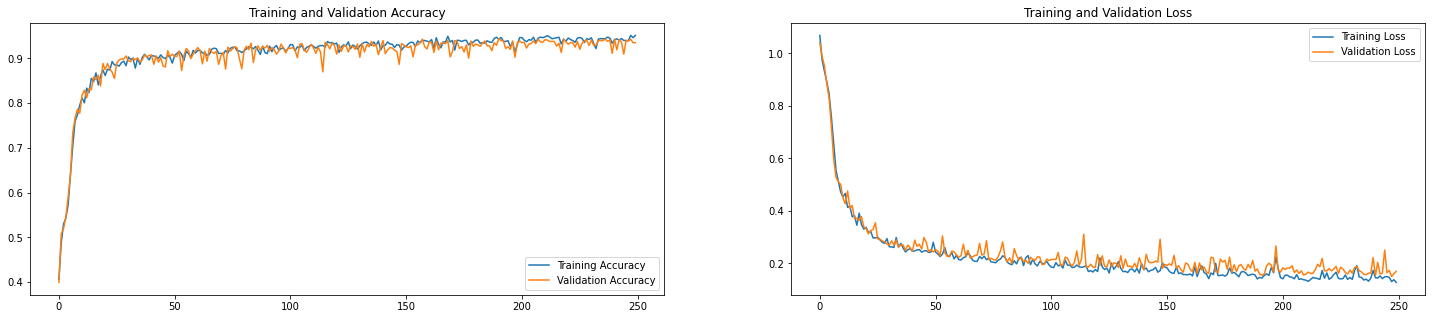

In [ ]:
import matplotlib.pyplot as plt

# Akurasi
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Loss
loss = history.history['loss']
validation_loss = history.history['val_loss']

# Jumlah epoch
epochs_range = range(len(history.history['accuracy']))

# Plotting metrics
plt.figure(figsize=(25, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

## Testing

In [ ]:
# Load Saving Model
modelCNN_Save = load_model('./Dataset/Model/model-250-0.95.h5')

OSError: No file or directory found at ./Dataset/Model/model-250-0.95.h5

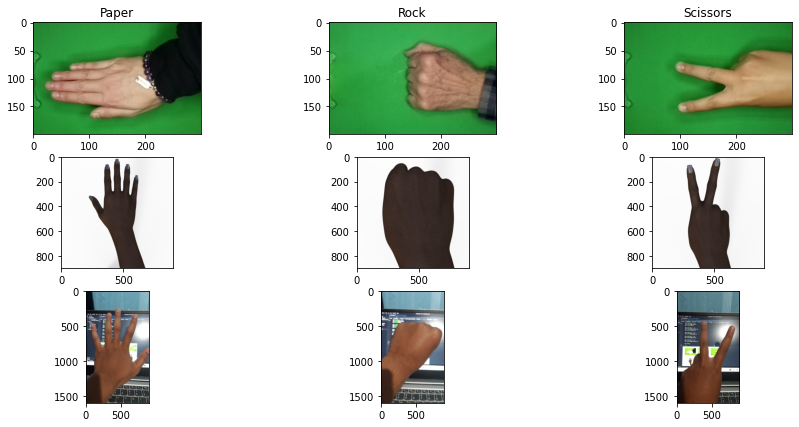

In [ ]:
import matplotlib.pyplot as plt

# Backgroung hijau
img_paper_1 = plt.imread('./Dataset/Testing_Model/1fKclJk4eBWOQSR1.png')
img_rock_1 = plt.imread('./Dataset/Testing_Model/1mnAKQCHEDbtjPX2.png')
img_scissors_1 = plt.imread('./Dataset/Testing_Model/1L1n6plr7jlZGirw.png')

# Backgroung putih
img_paper_2 = plt.imread('./Dataset/Testing_Model/paper-hires1.png')
img_rock_2 = plt.imread('./Dataset/Testing_Model/rock-hires1.png')
img_scissors_2 = plt.imread('./Dataset/Testing_Model/scissors-hires1.png')

# Tangan sendiri
img_paper_3 = plt.imread('./Dataset/Testing_Model/paper-sendiri.jpeg')
img_rock_3 = plt.imread('./Dataset/Testing_Model/rock-sendiri.jpeg')
img_scissors_3 = plt.imread('./Dataset/Testing_Model/scissors-sendiri.jpeg')

plt.figure(figsize=(15, 7))

plt.subplot(3, 3, 1)
plt.imshow(img_paper_1)
plt.title('Paper')

plt.subplot(3, 3, 2)
plt.imshow(img_rock_1)
plt.title('Rock')

plt.subplot(3, 3, 3)
plt.imshow(img_scissors_1)
plt.title('Scissors')

plt.subplot(3, 3, 4)
plt.imshow(img_paper_2)

plt.subplot(3, 3, 5)
plt.imshow(img_rock_2)

plt.subplot(3, 3, 6)
plt.imshow(img_scissors_2)

plt.subplot(3, 3, 7)
plt.imshow(img_paper_3)

plt.subplot(3, 3, 8)
plt.imshow(img_rock_3)

plt.subplot(3, 3, 9)
plt.imshow(img_scissors_3)

plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

def convertImage(img) :
    imgCitra = cv.imread(img)
    gray = skimage.color.rgb2gray(imgCitra)
    image = skimage.img_as_ubyte(gray)

    bins = np.array([0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 255])
    inds = np.digitize(image, bins)

    max_value = inds.max() + 1
    matrix_coocurrence = skimage.feature.greycomatrix(inds, [1], [0, 45, 90, 135], levels=max_value, normed=False, symmetric=False)

    dataImg = np.concatenate((
                    contrast_feature(matrix_coocurrence), dissimilarity_feature(matrix_coocurrence), homogeneity_feature(matrix_coocurrence),
                    energy_feature(matrix_coocurrence), correlation_feature(matrix_coocurrence), asm_feature(matrix_coocurrence)
                ), axis=1)

    dataTest = dataImg.reshape(1, 24, 1)

    return dataTest

In [ ]:
# Backgroung hijau
img_paper_1 = './Dataset/Testing_Model/1fKclJk4eBWOQSR1.png'
img_rock_1 = './Dataset/Testing_Model/1mnAKQCHEDbtjPX2.png'
img_scissors_1 = './Dataset/Testing_Model/1L1n6plr7jlZGirw.png'

# Backgroung putih
img_paper_2 = './Dataset/Testing_Model/paper-hires1.png'
img_rock_2 = './Dataset/Testing_Model/rock-hires1.png'
img_scissors_2 = './Dataset/Testing_Model/scissors-hires1.png'

# Tangan sendiri
img_paper_3 = './Dataset/Testing_Model/paper-sendiri.jpeg'
img_rock_3 = './Dataset/Testing_Model/rock-sendiri.jpeg'
img_scissors_3 = './Dataset/Testing_Model/scissors-sendiri.jpeg'

prediction = modelCNN_Save.predict(convertImage(img_rock_1), batch_size=10)
output_class = np.argmax(prediction)

if output_class == 0:
    print('Paper')
elif output_class == 1:
    print('Rock')
else:
    print('Scissors')

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in versi

Rock
